<a href="https://colab.research.google.com/github/sebagit914/FinalExam1/blob/main/Exam_II_SMOYA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Introducción

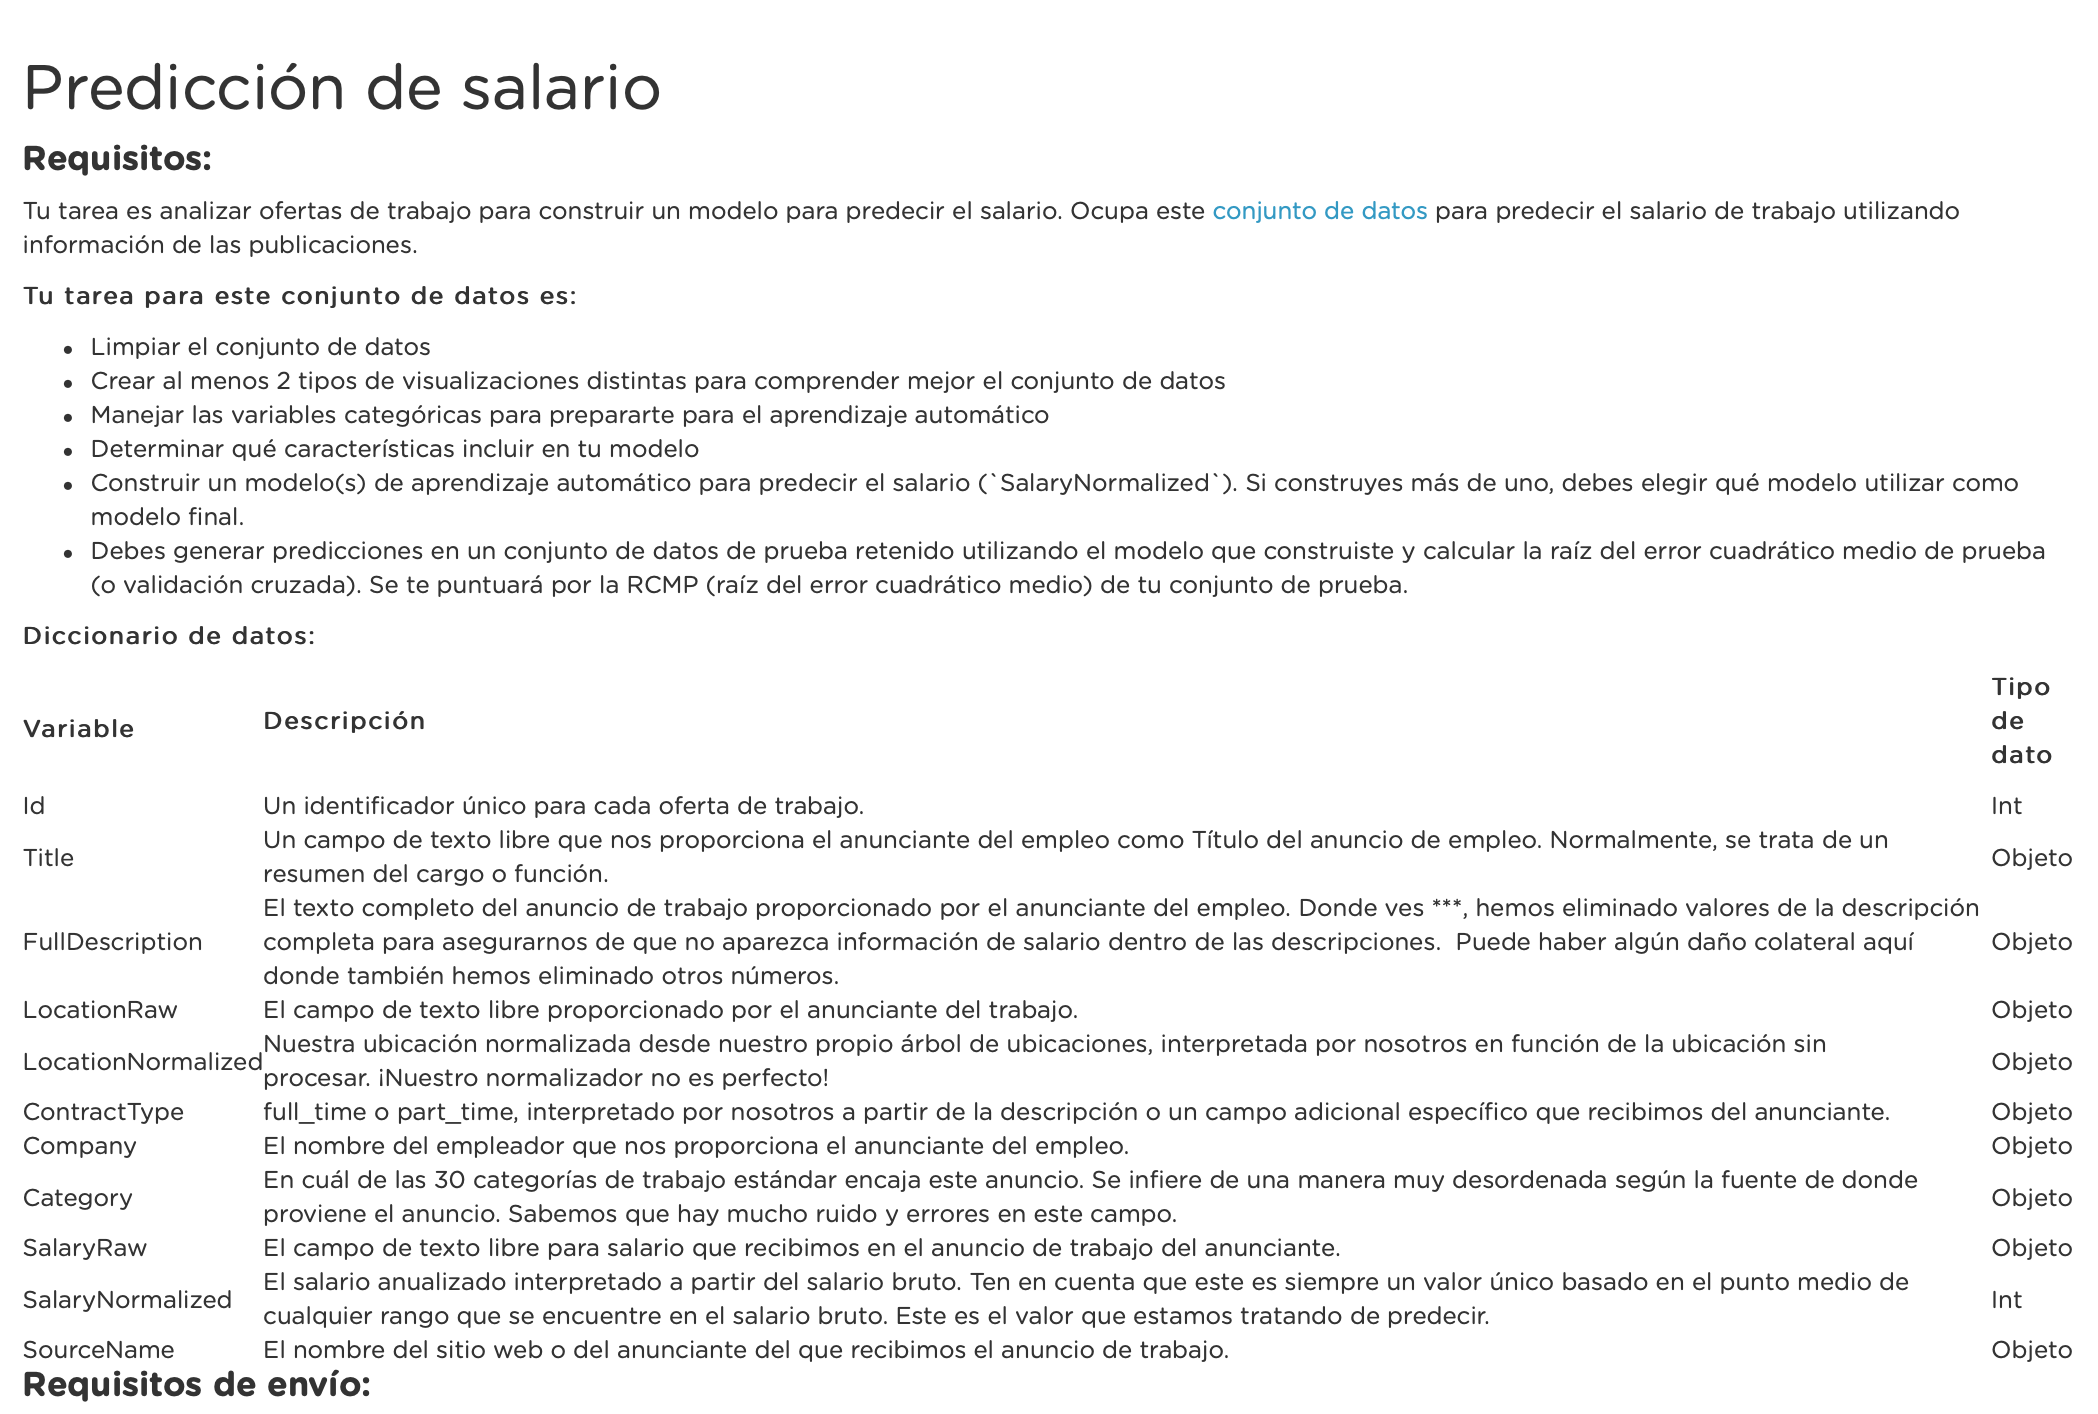

# 2 Importar librerías


In [ ]:
#DataFrame y visualización
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Entrenamiento y testeo
from sklearn.model_selection import train_test_split

#Metricas y preprocesamiento
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

#Modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

#Optimizador Hiperparametros
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

#Warnings
import warnings

# 3 Montar Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 4 Cargar base de datos


In [ ]:
filename = '/content/drive/MyDrive/Assigment/Exam_II_FInal/salary_train.csv'

df = pd.read_csv(filename)
df.head(5)

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


In [ ]:
# Observamos las últimas filas del dataset
df.tail()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
244763,72705211,TEACHER OF SCIENCE,Position: Qualified Teacher Subject/Specialism...,Swindon,Swindon,NaN,contract,NaN,Teaching Jobs,450 - 500 per week,22800,hays.co.uk
244764,72705212,TEACHER OF BUSINESS STUDIES AND ICT,Position: Qualified Teacher or NQT Subject/Spe...,Swindon,Swindon,NaN,contract,NaN,Teaching Jobs,450 - 500 per week,22800,hays.co.uk
244765,72705213,ENGLISH TEACHER,Position: Qualified Teacher Subject/Specialism...,Swindon,Swindon,NaN,contract,NaN,Teaching Jobs,450 - 500 per week,22800,hays.co.uk
244766,72705216,SUPPLY TEACHERS,Position: Qualified Teacher Subject/Specialism...,Wiltshire,Wiltshire,NaN,contract,NaN,Teaching Jobs,450 to 500 per week,22800,hays.co.uk
244767,72705235,Accountant,This entrepreneurial and growing private equit...,Hitchin,Hitchin,NaN,permanent,NaN,Teaching Jobs,"40-45,000",42500,hays.co.uk


In [ ]:
#Utilizamos el atributo shape para conocer la estructura del dataframe
df.shape

(244768, 12)

In [ ]:
# Revisar si las columnas corresponden al diccionario de datos o existen espacios en el nombre
df.columns

Index(['Id', 'Title', 'FullDescription', 'LocationRaw', 'LocationNormalized',
       'ContractType', 'ContractTime', 'Company', 'Category', 'SalaryRaw',
       'SalaryNormalized', 'SourceName'],
      dtype='object')

In [ ]:
#Revisamos la correspondencia al tipo de variable y contrastamos con el diccionario
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244768 entries, 0 to 244767
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Id                  244768 non-null  int64 
 1   Title               244767 non-null  object
 2   FullDescription     244768 non-null  object
 3   LocationRaw         244768 non-null  object
 4   LocationNormalized  244768 non-null  object
 5   ContractType        65442 non-null   object
 6   ContractTime        180863 non-null  object
 7   Company             212338 non-null  object
 8   Category            244768 non-null  object
 9   SalaryRaw           244768 non-null  object
 10  SalaryNormalized    244768 non-null  int64 
 11  SourceName          244767 non-null  object
dtypes: int64(2), object(10)
memory usage: 22.4+ MB


# 5 Limpieza de datos

In [ ]:
df.dtypes.value_counts()

object    10
int64      2
dtype: int64

In [ ]:
# Verificar que las columnas coincidan con el diccionario de datos señalado en el enunciado
df.dtypes

Id                     int64
Title                 object
FullDescription       object
LocationRaw           object
LocationNormalized    object
ContractType          object
ContractTime          object
Company               object
Category              object
SalaryRaw             object
SalaryNormalized       int64
SourceName            object
dtype: object

In [ ]:
# Verificar valores nulos en DF
df.isna().sum().sort_values(ascending = False)

ContractType          179326
ContractTime           63905
Company                32430
SourceName                 1
Title                      1
SalaryNormalized           0
SalaryRaw                  0
Category                   0
LocationNormalized         0
LocationRaw                0
FullDescription            0
Id                         0
dtype: int64

In [ ]:
#Aplicamos filtro para conocer la proporción entre nulos y únicos según dtype
df1 = pd.DataFrame(index = df.columns)
df1['data_type'] = df.dtypes
df1['nulos'] = df.isnull().sum()
df1['únicos'] = df.nunique()
df1

,data_type,nulos,únicos
Id,int64,0,244768
Title,object,1,135435
FullDescription,object,0,242138
LocationRaw,object,0,20986
LocationNormalized,object,0,2732
ContractType,object,179326,2
ContractTime,object,63905,2
Company,object,32430,20812
Category,object,0,29
SalaryRaw,object,0,97286


In [ ]:
#Eliminanos las columnas id (dado que no tiene incidencia en nuestra predicción) y las columnas 
#full description, location row ya que  son campos de texto libre proporcionados por el solicitante., y por último 
#source Name que representa el sitio web desde donde se recibe el anuncio, lo cual es irrelevante para nuestra predicción
df.drop(columns = ['Id','FullDescription', 'LocationRaw','ContractTime','SourceName'], inplace = True, axis = 1)

In [ ]:
#Revisamos que se hayan eliminado correctamente. Luego, tenemos sólo 8 features.
df.head()

,Title,LocationNormalized,ContractType,Company,Category,SalaryRaw,SalaryNormalized
0,Engineering Systems Analyst,Dorking,NaN,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000
1,Stress Engineer Glasgow,Glasgow,NaN,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000
2,Modelling and simulation analyst,Hampshire,NaN,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000
3,Engineering Systems Analyst / Mathematical Mod...,Surrey,NaN,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500
4,"Pioneer, Miser Engineering Systems Analyst",Surrey,NaN,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


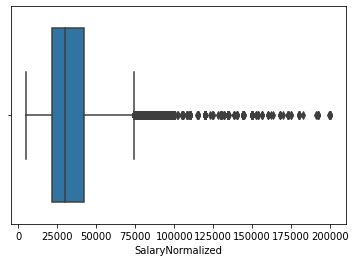

In [ ]:
#Revisamos outliers para nuestro target vector
sns.boxplot(df['SalaryNormalized'])

In [ ]:
# Eliminamos los outliers de nuestro target vector a través del método de los rangos intercuartiles , siguiendo el código guia de:
# https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

# IQR
Q1 = np.percentile(df['SalaryNormalized'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['SalaryNormalized'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper = np.where(df['SalaryNormalized'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['SalaryNormalized'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)

Old Shape:  (244768, 7)
New Shape:  (234967, 7)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


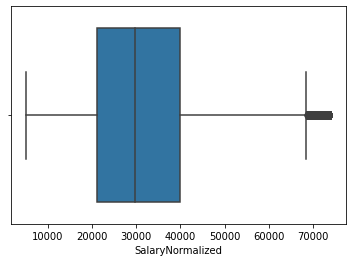

In [ ]:
#Data sin outliers para nuestro target vector
sns.boxplot(df['SalaryNormalized'])

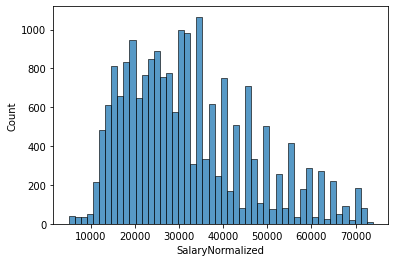

In [ ]:
sns.histplot(df['SalaryNormalized'])

Al revisar el diccionario de datos, se observa que la columna contractTime no está incorporada, por lo tanto debería ser eliminada del dataset.
Sin embargo, encontramos la relación que hay entre estas dos variables, lo cual podría ayudarnos con los valores nulos de la variable ContractType

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

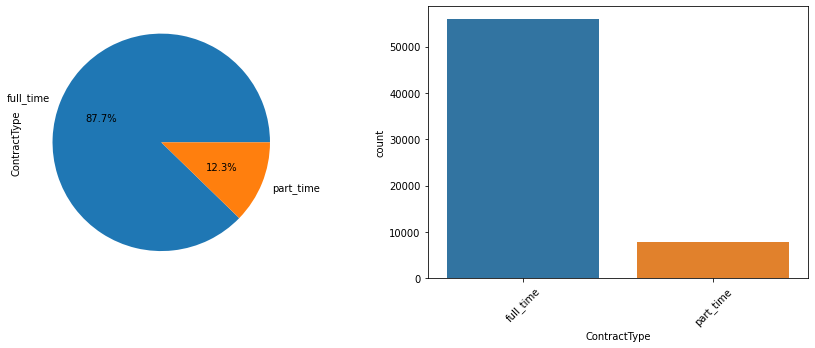

In [ ]:
#Ahora, analizamos la columna con mayor Revisamos la proporción de valores en la columna tipo de contrato , que representa la mayor cantidad de nulos
df['ContractType'].value_counts()
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['ContractType'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['ContractType'])
plt.xticks(rotation=45)

In [ ]:
#Como los valores son muy altos, los reemplazaremos con 'Otros"
for f in ["ContractType","Company"] :
    df[f].replace({np.nan:"Other"}, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234967 entries, 0 to 244767
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Title               234966 non-null  object
 1   LocationNormalized  234967 non-null  object
 2   ContractType        234967 non-null  object
 3   Company             234967 non-null  object
 4   Category            234967 non-null  object
 5   SalaryRaw           234967 non-null  object
 6   SalaryNormalized    234967 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 24.3+ MB


In [ ]:
#Aplicamos filtro para conocer la proporción entre nulos y únicos según dtype
df2 = pd.DataFrame(index = df.columns)
df2['data_type'] = df.dtypes
df2['nulos'] = df.isnull().sum()
df2['únicos'] = df.nunique()
df2

,data_type,nulos,únicos
Title,object,1,129082
LocationNormalized,object,0,2721
ContractType,object,0,3
Company,object,0,20523
Category,object,0,29
SalaryRaw,object,0,92726
SalaryNormalized,int64,0,8102


# Transformación de variables object a númerica

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df[['Title', 'LocationNormalized', 'ContractType', 'Company', 'Category', 'SalaryRaw']] = df[['Title', 'LocationNormalized', 'ContractType', 'Company', 'Category', 'SalaryRaw']].astype(str)

In [ ]:
categorical_col = ['Title', 'LocationNormalized', 'ContractType', 'Company', 'Category', 'SalaryRaw' ]

for col in categorical_col:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,Title,LocationNormalized,ContractType,Company,Category,SalaryRaw,SalaryNormalized
0,37497,748,0,7660,8,21126,25000
1,115547,983,0,7660,8,32186,30000
2,69936,1065,0,7660,8,21321,30000
3,37498,2299,0,7660,8,31599,27500
4,81408,2299,0,7660,8,21126,25000


In [ ]:
#Sólo contractype la transformamos en dummies. Las restantes , dado el alto número que alcanzan en valores únicos, se mantienen.
df = pd.get_dummies(df, columns = ['ContractType'])
df.head()

,Title,LocationNormalized,Company,Category,SalaryRaw,SalaryNormalized,ContractType_0,ContractType_1,ContractType_2
0,37497,748,7660,8,21126,25000,1,0,0
1,115547,983,7660,8,32186,30000,1,0,0
2,69936,1065,7660,8,21321,30000,1,0,0
3,37498,2299,7660,8,31599,27500,1,0,0
4,81408,2299,7660,8,21126,25000,1,0,0


In [ ]:
df.shape

(234967, 9)

# 6 Train Test Split / GridSearchCV

Metodología de aplicación: 

1. Aplicación de 3 modelos estudiados(2 ensambles) en clases con optimización de hiperparametros por medio de GridSearchCV.
- Random Forest
- Gradient Boosted 
- Extreme Gradient Boosted

2. Para la elección del mejor modelo se revisarán los score test y de preferencia MSE dado que castiga valores altos.

3. Dado que el dataset supera los 200 mil filas, y el entorno de ejecución no ha sido capaz de generar los resultados esperados debido a lo limitado de la RAM , se selecciona una submuestra del 10% de los datos aproximado.






In [ ]:
df = df.sample(n=20000, random_state=3)
df.shape

(20000, 9)

In [ ]:
df = df.reset_index()

In [ ]:
#Transformamos y obtenemos nuestro feature input "X" y el output o target vector de salida "y"
# Processing the whole dataframe
X = df.drop(columns = ['SalaryNormalized'])

y = df[['SalaryNormalized']]

In [ ]:
X.shape

(20000, 9)

In [ ]:
y.shape

(20000, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state =3)

In [ ]:
# Estandarizar datos
scalerX = StandardScaler().fit(X_train)
scalery = StandardScaler().fit(y_train)
X_train = scalerX.transform(X_train)
y_train = scalery.transform(y_train)
X_test = scalerX.transform(X_test)
y_test = scalery.transform(y_test)

In [ ]:
y_test

array([[-0.66626841],
       [ 0.28600197],
       [-1.16991364],
       ...,
       [ 1.27354163],
       [-0.31357568],
       [ 2.39411699]])

# 7 Aplicación de modelos

In [ ]:
# Importamos las librerias necesarias para las métricas
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor 
import xgboost as xgb
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import math
import sklearn.metrics as metrics
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
#Generamos nuestros score de train y test para medir RMSE, MSE,MAE y Score r2
def rmse(x,y):
  return math.sqrt(((x-y)**2).mean())

# Funcion para calcular todas las metricas relevantes

 
def print_score(m):
  res = [rmse(m.predict(X_train),y_train),rmse(m.predict(X_test), y_test),
         m.score(X_train, y_train), m.score(X_test, y_test),
         mean_squared_error(m.predict(X_train), y_train), mean_squared_error(m.predict(X_test), y_test),
         metrics.median_absolute_error(m.predict(X_train), y_train), metrics.median_absolute_error(m.predict(X_test), y_test),] 


  print('RMSE-train: ' + str(res[0])+ '\nRMSE-test: ' + str(res[1])+ 
      '\nScore-Train: ' + str(res[2]) + '\nScore-Test: ' + str(res[3])+
      '\nMSE-Train: ' + str(res[4]) + '\nMSE-Test: ' + str(res[5])+
      '\nMAE-Train: ' + str(res[6]) + '\nMAE-Test: '+ str(res[7]))
  

Da

## 7.1 Random Forest

El modelo de bosques aleatorios es un algoritmo de aprendizaje automático flexible y fácil de usar que produce, incluso sin ajuste de hiperparámetros, un gran resultado la mayor parte del tiempo. 💪

In [ ]:

# instanciamos el modelo
rf = RandomForestRegressor() # Ajuste del modelo a la data
rf.fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
# se imprimen los score del modelo
print_score(rf)

RMSE-train: 1.3751103846302295
RMSE-test: 1.3561036008438874
Score-Train: 0.975210753108202
Score-Test: 0.8111927262083187
MSE-Train: 0.024789246891797914
MSE-Test: 0.19088049941679663
MAE-Train: 0.024986316256520147
MAE-Test: 0.06463552868451569


In [ ]:
param_grid =  {  'bootstrap': [True], 
                           'max_depth': [5, 10, None], 
                           'max_features': ['auto', 'log2'], 
                           'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rfr = RandomForestRegressor(random_state = 1)


g_search = GridSearchCV(estimator = rfr, 
                        param_grid = param_grid, 
                        cv = 3, n_jobs = 1, 
                        verbose = 0)

g_search.fit(X_train, np.ravel(y_train))

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=1,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

In [ ]:
model1 = g_search.best_estimator_  

In [ ]:
rf1 = RandomForestRegressor()
rf1.set_params(**g_search.best_params_)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=15, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
rf1.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=15, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
rf1.score(X_test, y_test)

0.8008172689156483

In [ ]:
#MSE 
mse1 = mean_squared_error(y_test, rf1.predict(X_test))
mse1



0.20136988592151225

In [ ]:
#El scorte test y  MSE practicamente se mantienen sin variaciones importantes 

## 7.2 Gradient Boosted Regressor

In [ ]:
GBR = GradientBoostingRegressor() # ajustamos el modelo a la data
GBR.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
# imprimimos los resultados
print_score(GBR)

RMSE-train: 1.2487287920584014
RMSE-test: 1.2595903137544113
Score-Train: 0.7174272139164604
Score-Test: 0.7140467343453951
MSE-Train: 0.2825727860835396
MSE-Test: 0.28909321691831885
MAE-Train: 0.21448525397460524
MAE-Test: 0.225394341876683


In [ ]:
#GardientBoosting
params = {'n_estimators': 3000, 'max_depth': 1, 'min_samples_leaf':15, 'min_samples_split':10, 
          'learning_rate': 0.05, 'loss': 'huber','max_features':'sqrt'}
gbr_model = GradientBoostingRegressor(**params)
gbr_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='huber',
                          max_depth=1, max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=15, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=3000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
gbr_model.score(X_train, y_train)

0.5317456229967645

In [ ]:
#R2 Test
gbr_model.score(X_test, y_test)

0.5303972106873022

In [ ]:
#MSE Test KNN regressor
mse2 = mean_squared_error(y_test, gbr_model.predict(X_test))
mse2

0.4747593307789075

## 7.3 XGB Regression

Ensamble

In [ ]:
xgbr = XGBRegressor()
# Fit the model to the data
xgbr.fit(X_train,y_train)

[03:08:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
# print score of the model
print_score(xgbr)

RMSE-train: 1.2484347854166615
RMSE-test: 1.2593930238008184
Score-Train: 0.7161552374096638
Score-Test: 0.7132313056285216
MSE-Train: 0.28384476259033625
MSE-Test: 0.2899175995683611
MAE-Train: 0.21586570072909028
MAE-Test: 0.22497139610383815


In [ ]:
xgb1 = XGBRegressor()
parameters = {'nthread':[4],  
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07],  
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 10,
                        n_jobs = 5,
                        verbose=True)

In [ ]:
xgb_grid.fit(X_train,
         y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:  3.3min
[Parallel(n_jobs=5)]: Done  90 out of  90 | elapsed:  7.6min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg...
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.03, 0.05, 0.07],
                         'm

In [ ]:
model3 = xgb_grid.best_estimator_

In [ ]:
xgb2 =XGBRegressor()
xgb2.set_params(**xgb_grid.best_params_)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.07, max_delta_step=0,
             max_depth=7, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)

In [ ]:
xgb2.fit(X_test, y_test)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.07, max_delta_step=0,
             max_depth=7, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)

In [ ]:
#Score en testeo
xgb2.score(X_test, y_test)

0.9755141987209931

In [ ]:
#MSE XBG

mse3 = mean_squared_error(y_test, xgb2.predict(X_test))
mse3

0.024754671167563875

# 8 Conlusión

Basado en las metricas de perfomance, se selecciona el modelo Extreme Gradient Boosting.

Comparativamente, alcanza un score de 97% en test y un MSE de 0.024

